In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import seaborn as sns

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


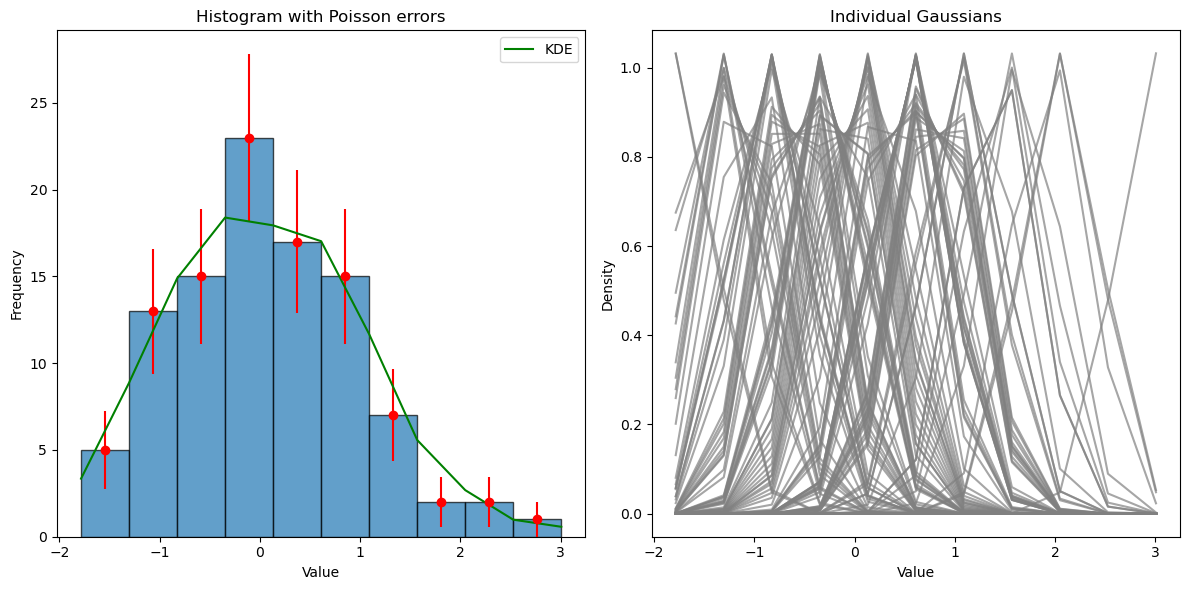

In [5]:
#1
N = 100
mean = 0
std = 1 
x = np.random.normal(mean, std, N)

#2
n_bins = int(np.sqrt(N))
fig, axes = plt.subplots(1,2,figsize=(12,6))
counts, bins, patches = axes[0].hist(x, bins=n_bins, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram with Poisson errors')
bin_centers = 0.5 * (bins[1:] + bins[:-1])
poisson_errors = np.sqrt(counts)
axes[0].errorbar(bin_centers, counts, yerr=poisson_errors, fmt='o', color='red')
#3
std_kde = 1.06 * x.std() * N**(-1/5)
gaussians = [stats.norm(xi, std_kde).pdf(bins) for xi in x]
#4
for gaussian in gaussians:
    axes[1].plot(bins, gaussian, color='grey', alpha=0.7)
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('Individual Gaussians')
plt.tight_layout()
#5
summed_gaussians = np.sum(gaussians, axis=0)
area_histogram = np.sum(np.diff(bins) * counts)
area_kde = scipy.integrate.trapz(summed_gaussians, bins)
normalized_kde = summed_gaussians * (area_histogram / area_kde)
axes[0].plot(bins, normalized_kde, label='KDE', color='green')
axes[0].legend()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

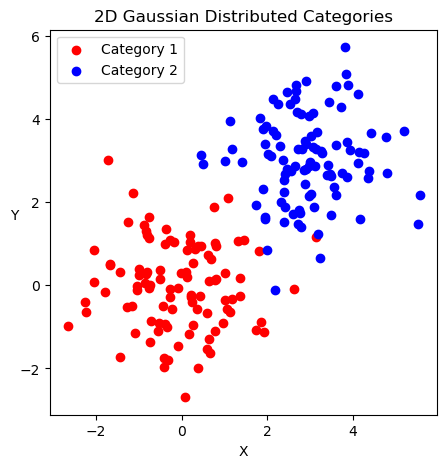

In [12]:
def generate_dataset(points, mean, std):
    category_x = np.random.normal(mean[0], std[0], points)
    category_y = np.random.normal(mean[1], std[1], points)
    category_data = np.column_stack((category_x, category_y))
    return category_data

points = 100
mean1 = (0,0)
std1 = (1,1)
mean2 = (3,3)
std2 = (1,1)

category1_data = generate_dataset(points, mean1, std1)
category2_data = generate_dataset(points, mean2, std2)

plt.figure(figsize=(5, 5))
plt.scatter(category1_data[:, 0], category1_data[:, 1], color='red', label='Category 1')
plt.scatter(category2_data[:, 0], category2_data[:, 1], color='blue', label='Category 2')
plt.title("2D Gaussian Distributed Categories")
plt.xlabel("X")
plt.ylabel("Y", rotation="horizontal")
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

   residuals  distances
0       1.10       16.0
1      -1.95        6.3
2      -7.20        3.4
3      -4.15        8.4
4      -6.59        1.7


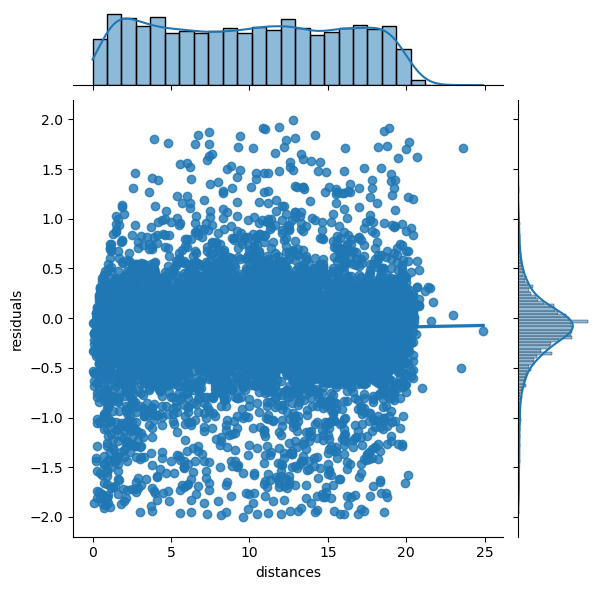

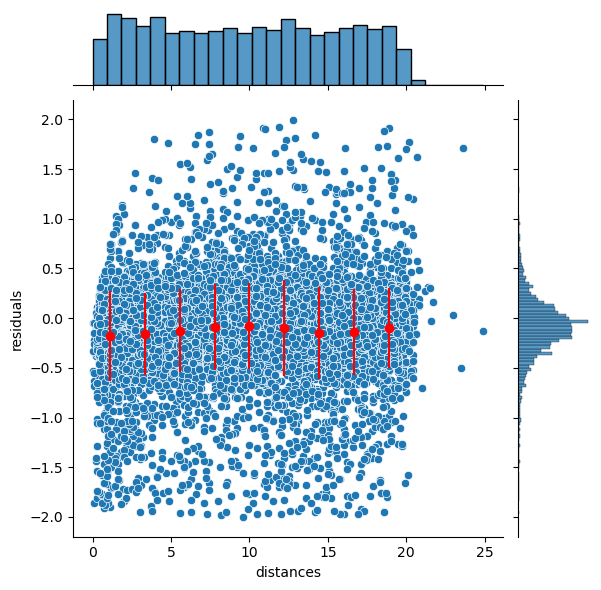

In [12]:
#1
data = np.load('residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(data)
print(df.head())
#2
df_cleaned = df[df['residuals'].abs() < 2]
#3
slope, intercept, r_value, p_value, std_err = stats.linregress(df_cleaned['distances'], 
                                                               df_cleaned['residuals'])
#4
sns.jointplot(x='distances', y='residuals', data=df_cleaned, kind='reg')
plt.show()
#5
n_bins = 10
bins = np.linspace(0, 20, n_bins)
x = 0.5 * (bins[:-1] + bins[1:])
cleaned['distance_bin'] = pd.cut(cleaned['distances'], bins, include_lowest=True, right=False)
grouped = cleaned.groupby('distance_bin')
y = grouped['residuals'].mean()
erry = grouped['residuals'].std()
#6
sns.jointplot(x='distances', y='residuals', data=df_cleaned, kind='scatter')
plt.errorbar(x, y, yerr=erry, fmt='o', color='red') 
plt.show()
